In [1]:
# To use EfficientNetB0 for classifying 1000 classes of images from imagenet, we can use Imagenet weights.

from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights='imagenet')  #trained on 1000 classes of Imagenet dataset

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

Input image shape: (1, 224, 224, 3)


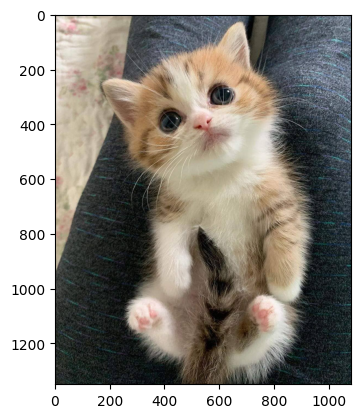

In [4]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/cat.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [5]:
preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
predicted class:  [[1.01590114e-04 2.37425018e-04 1.28573651e-04 2.58633285e-04
  6.34587996e-05 2.53223610e-04 1.59206218e-04 2.16676795e-04
  4.16164898e-04 8.23579088e-04 7.92517530e-05 3.15836311e-04
  1.24465339e-04 3.93877825e-04 1.07400359e-04 1.76517889e-04
  1.66328275e-04 2.01145856e-04 2.10695231e-04 8.62941670e-05
  1.51765038e-04 1.82976131e-04 7.10313252e-05 5.16489963e-04
  9.03194232e-05 3.62144900e-04 1.44021324e-04 1.73749897e-04
  1.19002849e-04 2.05884076e-04 1.15336792e-04 4.50700056e-04
  8.87983944e-04 7.09704545e-05 1.28663683e-04 6.63113460e-05
  5.57035382e-05 1.09847831e-04 1.50496489e-03 1.65727703e-04
  1.48965089e-04 1.56204187e-04 2.10949962e-04 2.05072705e-04
  2.03949588e-04 1.32952904e-04 2.34937484e-04 4.44912584e-04
  6.78208453e-05 1.74200206e-04 1.32123969e-04 2.42960348e-04
  2.21875758e-04 1.61888776e-04 2.53455684e-04 1.17253687e-04
  1.67941631e-04 1.37548064e-04 1.40325836e-04 1.62838129e-04
  3.74207913e-

In [6]:
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n02123394', 'Persian_cat', 0.5486113),
  ('n02124075', 'Egyptian_cat', 0.037199),
  ('n02123045', 'tabby', 0.03335828)]]


#EfficientNetB1 Pretrained Model

In [8]:
from tensorflow.keras.applications import EfficientNetB1
model = EfficientNetB1(weights='imagenet')  #trained on 1000 classes of Imagenet dataset

In [9]:
model.summary()

Model: "efficientnetb1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 240, 240, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_4 (Rescaling)   │ (None, 240, 240, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_2           │ (None, 240, 240, 3)    │              7 │ rescaling_4[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_5 (Rescaling)   │ (None, 240, 240, 3)    │              0 │ normalization_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 241, 241, 3)    │              0 │ rescaling_5[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 120, 120, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 120, 120, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 120, 120, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 120, 120, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 120, 120, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 120, 120, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 7,856,239 (29.97 MB)

 Trainable params: 7,794,184 (29.73 MB)

 Non-trainable params: 62,055 (242.41 KB)

Input image shape: (1, 240, 240, 3)


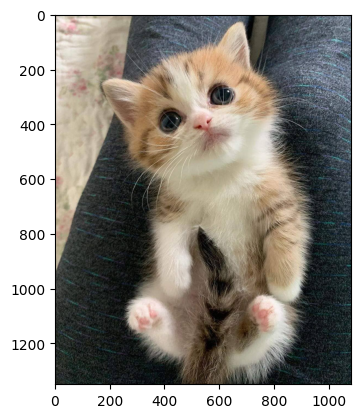

In [10]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/cat.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (240, 240))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [11]:

preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 1000 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
predicted class:  [[6.89074805e-05 1.20854769e-04 8.63776004e-05 1.83694938e-04
  5.98443403e-05 2.58755346e-04 7.92203209e-05 3.43244101e-05
  1.01147569e-04 4.24600410e-04 6.02612090e-05 2.48619705e-04
  2.63607566e-04 4.42899036e-05 1.22737008e-04 1.23092643e-04
  1.21358789e-04 5.03475312e-05 5.90474301e-05 1.79772524e-05
  4.93885091e-05 1.15927105e-04 9.08631118e-05 1.89073093e-04
  7.55671936e-05 6.86184794e-05 1.01733131e-04 9.78401004e-05
  7.11340399e-05 6.88589353e-05 4.96564389e-05 9.59299432e-05
  1.12525871e-04 8.32621299e-05 4.20880060e-05 8.16436732e-05
  2.88012798e-05 9.84787112e-05 1.42991499e-04 1.11875728e-04
  7.49922110e-05 1.52869034e-04 1.40764838e-04 8.39215645e-05
  5.32771883e-05 8.59208740e-05 7.08221269e-05 3.60733939e-05
  4.68137805e-05 2.64208957e-05 4.19213247e-05 7.36304355e-05
  1.58645445e-04 6.43553212e-05 6.01905631e-05 6.46982735e-05
  3.93805749e-05 1.53153582e-04 1.19494383e-04 3.84348787e-05
  5.35705003e-

In [12]:
decode_predictions(preds,top=3)  #  # probabilities for being in top of the 3 classes

[[('n02123394', 'Persian_cat', 0.66835535),
  ('n02123045', 'tabby', 0.08321747),
  ('n02124075', 'Egyptian_cat', 0.023637936)]]

#EfficientNetB7 Pretrained Model

In [13]:
from tensorflow.keras.applications import EfficientNetB7
modelb7 = EfficientNetB7(weights='imagenet')  #trained on 1000 classes of Imagenet dataset

268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [14]:
modelb7.summary()

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 600, 600, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_6 (Rescaling)   │ (None, 600, 600, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_3           │ (None, 600, 600, 3)    │              7 │ rescaling_6[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_7 (Rescaling)   │ (None, 600, 600, 3)    │              0 │ normalization_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 601, 601, 3)    │              0 │ rescaling_7[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 300, 300, 64)   │          1,728 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 300, 300, 64)   │            256 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 300, 300, 64)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 300, 300, 64)   │            576 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 300, 300, 64)   │            256 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 300, 300, 64)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 64)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 64)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 16)       │          1,040 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

Input image shape: (1, 600, 600, 3)


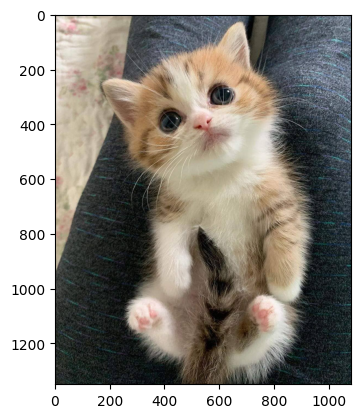

In [15]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = '/content/cat.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (600, 600))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [19]:
predb7=modelb7.predict(x)
print("predicted class: ", predb7 )    # probabilities for being in 1000 classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted class:  [[2.18884335e-04 1.95860310e-04 1.10075758e-04 1.15317482e-04
  1.06255000e-04 7.47966056e-04 1.28888860e-04 3.48541107e-05
  1.43157333e-04 3.42875632e-04 9.82837737e-05 7.44600984e-05
  1.81760246e-04 1.03620820e-04 1.58356634e-04 1.69003804e-04
  6.26736582e-05 2.07177625e-04 1.54352325e-04 7.73994543e-05
  9.60925900e-05 2.43160626e-04 9.17753787e-05 2.50062323e-04
  2.86948023e-04 9.81347621e-05 8.36467079e-05 1.93328859e-04
  1.12121197e-04 1.37373776e-04 7.00199962e-05 1.44632955e-04
  1.12289628e-04 1.00541030e-04 1.47716710e-04 1.18533644e-04
  1.24951461e-04 1.05344901e-04 3.66712979e-04 9.45410211e-05
  1.62087061e-04 1.61512289e-04 2.54392595e-04 1.30718065e-04
  1.36396644e-04 1.14359093e-04 1.55034199e-04 8.74354155e-05
  8.02742725e-05 1.21223718e-04 7.07389845e-05 1.18253287e-04
  2.46173004e-04 2.31347833e-04 1.82134085e-04 1.75832727e-04
  7.61479823e-05 1.75697685e-04 3.24068271e-04 3.60683654e-04
  1.60923868e-

In [20]:
decode_predictions(predb7,top=3)  #  # probabilities in top of the 3 classes

[[('n02123394', 'Persian_cat', 0.493439),
  ('n02123045', 'tabby', 0.19017953),
  ('n02123159', 'tiger_cat', 0.060528193)]]